In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from simple_fc import Encoder,Decoder
from cvae import Conditional_Variational_Autoencoder
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
n = mnist.train.num_examples
x, y = mnist.train.next_batch(n)

In [4]:
# Remove all but the first n_save images of a digit

n_save = 0
digit = 8

print x.shape[0]
idx = np.where((y[:, digit] == 1))[0]
idx = idx[n_save:]
print len(idx)
x_removed = np.delete(x, idx, axis=0)
print x_removed.shape[0]
y_removed = np.delete(y, idx, axis=0)
dataset = DataSet(x_removed, y_removed, dtype=dtypes.float32, reshape=False)
#dataset = DataSet(x, y, reshape=False)
#xnew, ynew = dataset.next_batch(n)

55000
5389
49611


In [10]:
tf.reset_default_graph()

In [23]:
# Training
#sess = tf.InteractiveSession()
#build_encoder = Encoder(100)
#build_decoder = Decoder(100)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 20,img_dim = 784, dataset = dataset,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           condition_on_label=True,
#                                            checkpoint_name = 'cvae_label_restricted_remove8_0_checkpoint')
#model.train()

Epoch 1 loss: 185.246109661
Epoch 2 loss: 135.760361225
Epoch 3 loss: 124.620938259
Epoch 4 loss: 118.614363372
Epoch 5 loss: 115.108060809
Epoch 6 loss: 112.594656318
Epoch 7 loss: 110.758208506
Epoch 8 loss: 109.151899271
Epoch 9 loss: 108.048447888
Epoch 10 loss: 107.065202244
Epoch 11 loss: 106.143926657
Epoch 12 loss: 105.342072186
Epoch 13 loss: 104.560762087
Epoch 14 loss: 104.118382492
Epoch 15 loss: 103.563283918
Epoch 16 loss: 102.978063914
Epoch 17 loss: 102.681771992
Epoch 18 loss: 102.043927267
Epoch 19 loss: 101.796658592
Epoch 20 loss: 101.480972051
Epoch 21 loss: 101.100823147
Epoch 22 loss: 100.980484923
Epoch 23 loss: 100.537377913
Epoch 24 loss: 100.188858172
Epoch 25 loss: 100.131631254
Epoch 26 loss: 99.8283043753
Epoch 27 loss: 99.5887795563
Epoch 28 loss: 99.3302395506
Epoch 29 loss: 99.2791295121
Epoch 30 loss: 99.0395347212
Epoch 31 loss: 99.0718535291
Epoch 32 loss: 98.7010257399
Epoch 33 loss: 98.6421347525
Epoch 34 loss: 98.4704000511
Epoch 35 loss: 98.30460

In [14]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(100)
build_decoder = Decoder(100)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 20,img_dim = 784,dataset = dataset,
                                            learning_rate = 0.001, num_epochs = 50,
                                           condition_on_label=True,
                                            load = True,
                                            #load_file = 'checkpoints/cvae_label_restricted_remove8_100_checkpoint'
                                            #load_file = 'checkpoints/cvae_label_restricted_remove8_10_checkpoint'
                                            load_file = 'checkpoints/cvae_label_restricted_remove8_0_checkpoint'
                                           )

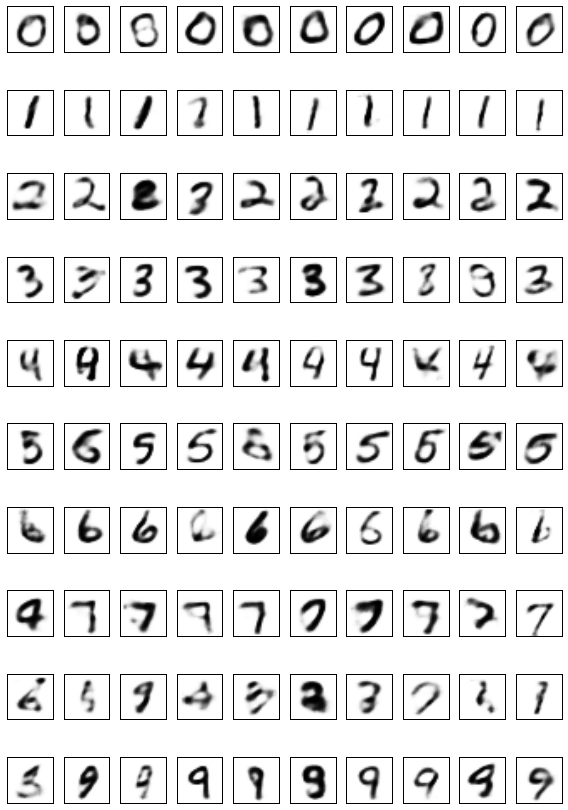

In [15]:
#images, info = mnist.test.next_batch(100)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)

num_show = 5
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/by_label_restricted_remove8_100')
#plt.savefig('images/by_label_restricted_remove8_10')
plt.savefig('images/by_label_restricted_remove8_0')
plt.show()

In [13]:
sess.close()
tf.reset_default_graph()